In [46]:
# !pip install docx2txt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import os
import collections

import docx2txt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
arr = ['Analytics', 'Data-driven', 'intelligence', 
'warehousing', 'mining', 'visualisation', 'Predictive', 
'Statistics', 'Marketing', 'Financial', 'insights',
'Strategic', 'planning', 'Leadership', 'management', 'Project', 'engagement',
'Presentation', 'Technical', 'Problem-solving', 'Decision-making',
'Communication', 'Interpersonal', 'Industry', 'expertise', 'Innovation', 
'Continuous']

# Translate for match
arr = [word.lower() for word in arr]

{'analytics': 14, 'insights': 8, 'project': 7, 'marketing': 4, 'management': 4, 'financial': 3, 'strategic': 2, 'technical': 1, 'expertise': 1, 'communication': 1, 'visualisation': 1, 'intelligence': 1}


C:\Users\ryana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


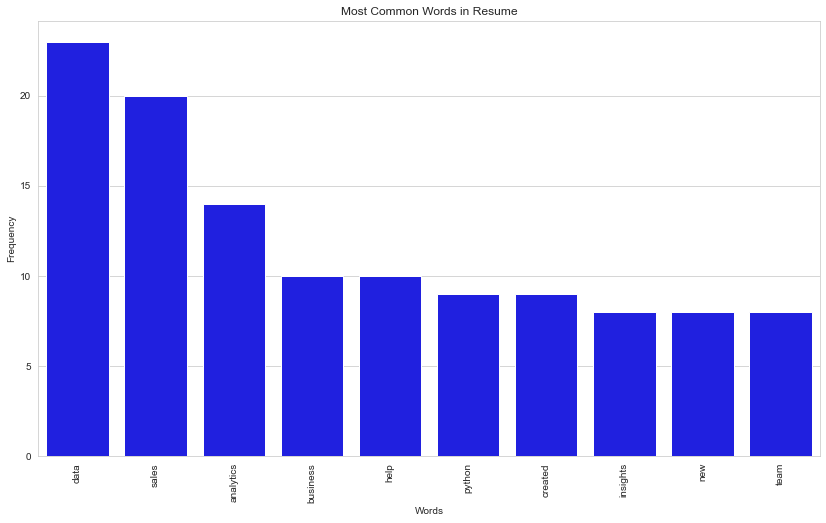

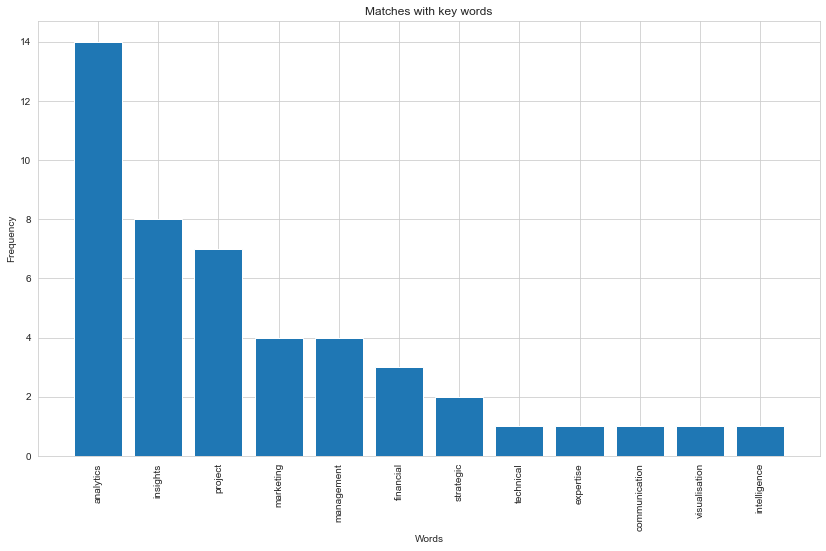

In [53]:
# Load resume text
resume = docx2txt.process("resume/resume.docx")


# Tokenize the text into words
words = word_tokenize(resume)

# Remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words("english"))
words = [word.lower() for word in words if word.isalpha() and word not in stop_words]

keyword_counts = Counter(words)

keyword_counts = {word: keyword_counts[word] for word in keyword_counts if word in arr}
keyword_counts = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
keyword_counts = dict(keyword_counts)
print(keyword_counts)

# Find the most frequent words
fdist = FreqDist(words)
most_common_words = fdist.most_common(10)



# Plot the frequency of the most common words
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
sns.barplot([word for word, frequency in most_common_words], [frequency for word, frequency in most_common_words], color="blue")
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Resume")
plt.show()

# Plot count matches to key words
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
plt.bar(range(len(keyword_counts)), list(keyword_counts.values()), align='center')
plt.xticks(range(len(keyword_counts)), list(keyword_counts.keys()))
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Matches with key words")
plt.show()